# SRT v2 - Ensayo

In [1]:
import random
import string
import pandas as pd
import numpy as np
from datetime import date

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

### Importamos Datos

In [2]:
df = pd.read_csv('cod_postal_series.csv', header=0,
                 names=['codigo','año','mes','total_cp'],
                 dtype={'codigo': str, 'año': str, 'mes': str, 'total_cp': str})

In [3]:
df.head()

,codigo,año,mes,total_cp
0,0,2022.0,1,208
1,0,2022.0,2,185
2,0,2022.0,3,289
3,0,2022.0,4,177
4,0,2022.0,5,177


### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147066 entries, 0 to 147065
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   codigo    147066 non-null  object
 1   año       147066 non-null  object
 2   mes       147066 non-null  object
 3   total_cp  147066 non-null  object
dtypes: object(4)
memory usage: 4.5+ MB


#### Ajustamos tipo de datos

In [5]:
df['año'] = pd.to_numeric(df['año'], downcast='integer') #corregimos el formato de la columna 

In [6]:
df['mes'] = pd.to_numeric(df['mes']) #corregimos el formato de la columna 

In [7]:
df['total_cp'] = pd.to_numeric(df['total_cp']) #corregimos el formato de la columna 

In [8]:
df.dtypes

codigo      object
año          int16
mes          int64
total_cp     int64
dtype: object

In [9]:
df.head()

,codigo,año,mes,total_cp
0,0,2022,1,208
1,0,2022,2,185
2,0,2022,3,289
3,0,2022,4,177
4,0,2022,5,177


In [10]:
df.sort_values(['año','mes'], ascending=True)

,codigo,año,mes,total_cp
0,0,2022,1,208
33,01000000,2022,1,19
49,01001000,2022,1,172
65,01002000,2022,1,20
81,01003000,2022,1,7
...,...,...,...,...
146965,Z9050DJG,2023,4,1
146969,Z9303XAT,2023,4,1
146971,Z9310BDE,2023,4,1
146990,Z9400BJA,2023,4,1


#### Verificamos cantidad de registros por codigo

In [11]:
codigos = df.value_counts('codigo')

In [12]:
mayores_a_15 = codigos[codigos > 15]

In [13]:
df = df[df['codigo'].isin(mayores_a_15.index)]

In [14]:
df

,codigo,año,mes,total_cp
0,0,2022,1,208
1,0,2022,2,185
2,0,2022,3,289
3,0,2022,4,177
4,0,2022,5,177
...,...,...,...,...
146961,Z9050DJG,2022,12,2
146962,Z9050DJG,2023,1,2
146963,Z9050DJG,2023,2,6
146964,Z9050DJG,2023,3,1


### Transformacion

#### LabelEncoder

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
# Crear una instancia de OneHotEncoder
encoder = LabelEncoder()

In [17]:
# Codificar los valores alfanuméricos
X_encoded = encoder.fit_transform(df.codigo.values.reshape(-1,))

In [18]:
X_encoded.shape

(25440,)

In [19]:
pd.DataFrame(X_encoded)

,0
0,0
1,0
2,0
3,0
4,0
...,...
25435,1589
25436,1589
25437,1589
25438,1589


#### Embeddings

In [20]:
tamano_embedding = 10

In [21]:
matriz_embedding = np.random.rand(len(encoder.classes_), tamano_embedding)

In [22]:
matriz_embedding

array([[5.73469238e-01, 8.27287802e-02, 4.13685974e-01, ...,
        3.60126416e-02, 6.91410907e-01, 3.07228098e-01],
       [7.98251235e-01, 2.85955740e-01, 9.80161907e-01, ...,
        2.11760466e-02, 9.95807754e-01, 6.27964946e-01],
       [5.77719846e-01, 2.28534294e-01, 4.72940573e-01, ...,
        4.47196782e-01, 9.59950798e-01, 6.08494447e-01],
       ...,
       [9.75149941e-02, 1.09281586e-01, 6.57825009e-01, ...,
        4.27983563e-01, 7.35646595e-01, 6.87304904e-01],
       [6.49260137e-01, 8.78549942e-02, 1.57970205e-05, ...,
        2.04795833e-02, 4.37595050e-01, 2.77727634e-01],
       [2.65335551e-01, 1.95350321e-01, 7.45732446e-01, ...,
        2.10933051e-01, 9.90677492e-01, 4.06014635e-01]])

In [23]:
encoder.classes_

array(['0', '01000000', '01001000', ..., 'Y4612JYI', 'Y4612XAI',
       'Z9050DJG'], dtype=object)

In [24]:
# Vectores de embeddings asociados a un valor por cada atributo
atributos_embeddings = matriz_embedding[X_encoded]

In [25]:
atributos_embeddings.shape

(25440, 10)

#### Verificacion embeddings

In [26]:
i = 0
encoder.classes_[i]

'0'

In [27]:
matriz_embedding[i]

array([0.57346924, 0.08272878, 0.41368597, 0.69635071, 0.1214964 ,
       0.73975869, 0.725563  , 0.03601264, 0.69141091, 0.3072281 ])

In [28]:
matriz_embedding.shape

(1590, 10)

#### Dataframe con datos de embeddings

In [29]:
# Creamos un nuevo dataframe con los valores del embedding
embedding_df = pd.DataFrame(matriz_embedding, columns=[f'emb_{i}' for i in range(matriz_embedding.shape[1])])

In [30]:
embedding_df

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9
0,0.573469,0.082729,0.413686,0.696351,0.121496,0.739759,0.725563,0.036013,0.691411,0.307228
1,0.798251,0.285956,0.980162,0.985679,0.274043,0.190618,0.961906,0.021176,0.995808,0.627965
2,0.577720,0.228534,0.472941,0.622453,0.594327,0.490649,0.146937,0.447197,0.959951,0.608494
3,0.710298,0.540441,0.427143,0.908156,0.349211,0.002231,0.045856,0.117276,0.028208,0.088853
4,0.552860,0.371347,0.274498,0.643544,0.492171,0.670339,0.046941,0.065428,0.314315,0.630633
...,...,...,...,...,...,...,...,...,...,...
1585,0.035327,0.230931,0.229251,0.812109,0.700170,0.873491,0.844230,0.677720,0.988426,0.945460
1586,0.683037,0.044977,0.876994,0.046274,0.451872,0.297921,0.840191,0.376121,0.510636,0.632490
1587,0.097515,0.109282,0.657825,0.055851,0.693499,0.901169,0.124258,0.427984,0.735647,0.687305
1588,0.649260,0.087855,0.000016,0.086361,0.274221,0.033645,0.362395,0.020480,0.437595,0.277728


In [31]:
embedding_df['codigo'] = encoder.classes_

In [32]:
# Utilizamos el codigo como indice (para joinear)
embedding_df = embedding_df.set_index('codigo')
embedding_df

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9
codigo,,,,,,,,,,
0,0.573469,0.082729,0.413686,0.696351,0.121496,0.739759,0.725563,0.036013,0.691411,0.307228
01000000,0.798251,0.285956,0.980162,0.985679,0.274043,0.190618,0.961906,0.021176,0.995808,0.627965
01001000,0.577720,0.228534,0.472941,0.622453,0.594327,0.490649,0.146937,0.447197,0.959951,0.608494
01002000,0.710298,0.540441,0.427143,0.908156,0.349211,0.002231,0.045856,0.117276,0.028208,0.088853
01003000,0.552860,0.371347,0.274498,0.643544,0.492171,0.670339,0.046941,0.065428,0.314315,0.630633
...,...,...,...,...,...,...,...,...,...,...
Y4604CJC,0.035327,0.230931,0.229251,0.812109,0.700170,0.873491,0.844230,0.677720,0.988426,0.945460
Y4610XAH,0.683037,0.044977,0.876994,0.046274,0.451872,0.297921,0.840191,0.376121,0.510636,0.632490
Y4612JYI,0.097515,0.109282,0.657825,0.055851,0.693499,0.901169,0.124258,0.427984,0.735647,0.687305


In [33]:
# Utilizamos el codigo como indice (para joinear)
df = df.set_index('codigo')
df

,año,mes,total_cp
codigo,,,
0,2022,1,208
0,2022,2,185
0,2022,3,289
0,2022,4,177
0,2022,5,177
...,...,...,...
Z9050DJG,2022,12,2
Z9050DJG,2023,1,2
Z9050DJG,2023,2,6


In [34]:
df.total_cp.max()

5314

#### Transformar la variable de salida

In [35]:
mmscaler = MinMaxScaler()

In [36]:
df['total_cp'] = mmscaler.fit_transform(df['total_cp'].values.reshape(-1,1))

In [37]:
df.head()

,año,mes,total_cp
codigo,,,
0,2022,1,0.038961
0,2022,2,0.034632
0,2022,3,0.054207
0,2022,4,0.033126
0,2022,5,0.033126


#### Joins de Dataframes

In [38]:
df_join = embedding_df.join(df, lsuffix='_izq', rsuffix='_der')
df_join

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,año,mes,total_cp
codigo,,,,,,,,,,,,,
0,0.573469,0.082729,0.413686,0.696351,0.121496,0.739759,0.725563,0.036013,0.691411,0.307228,2022,1,0.038961
0,0.573469,0.082729,0.413686,0.696351,0.121496,0.739759,0.725563,0.036013,0.691411,0.307228,2022,2,0.034632
0,0.573469,0.082729,0.413686,0.696351,0.121496,0.739759,0.725563,0.036013,0.691411,0.307228,2022,3,0.054207
0,0.573469,0.082729,0.413686,0.696351,0.121496,0.739759,0.725563,0.036013,0.691411,0.307228,2022,4,0.033126
0,0.573469,0.082729,0.413686,0.696351,0.121496,0.739759,0.725563,0.036013,0.691411,0.307228,2022,5,0.033126
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Z9050DJG,0.265336,0.195350,0.745732,0.669963,0.318374,0.101190,0.635242,0.210933,0.990677,0.406015,2022,12,0.000188
Z9050DJG,0.265336,0.195350,0.745732,0.669963,0.318374,0.101190,0.635242,0.210933,0.990677,0.406015,2023,1,0.000188
Z9050DJG,0.265336,0.195350,0.745732,0.669963,0.318374,0.101190,0.635242,0.210933,0.990677,0.406015,2023,2,0.000941


#### Datos de entrenamiento

In [39]:
df_final = df_join.reset_index()
df_final

,codigo,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,año,mes,total_cp
0,0,0.573469,0.082729,0.413686,0.696351,0.121496,0.739759,0.725563,0.036013,0.691411,0.307228,2022,1,0.038961
1,0,0.573469,0.082729,0.413686,0.696351,0.121496,0.739759,0.725563,0.036013,0.691411,0.307228,2022,2,0.034632
2,0,0.573469,0.082729,0.413686,0.696351,0.121496,0.739759,0.725563,0.036013,0.691411,0.307228,2022,3,0.054207
3,0,0.573469,0.082729,0.413686,0.696351,0.121496,0.739759,0.725563,0.036013,0.691411,0.307228,2022,4,0.033126
4,0,0.573469,0.082729,0.413686,0.696351,0.121496,0.739759,0.725563,0.036013,0.691411,0.307228,2022,5,0.033126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25435,Z9050DJG,0.265336,0.195350,0.745732,0.669963,0.318374,0.101190,0.635242,0.210933,0.990677,0.406015,2022,12,0.000188
25436,Z9050DJG,0.265336,0.195350,0.745732,0.669963,0.318374,0.101190,0.635242,0.210933,0.990677,0.406015,2023,1,0.000188
25437,Z9050DJG,0.265336,0.195350,0.745732,0.669963,0.318374,0.101190,0.635242,0.210933,0.990677,0.406015,2023,2,0.000941
25438,Z9050DJG,0.265336,0.195350,0.745732,0.669963,0.318374,0.101190,0.635242,0.210933,0.990677,0.406015,2023,3,0.000000


In [40]:
X_data = df_final.drop(['codigo','total_cp'], axis=1).to_numpy()

In [41]:
X_data.shape

(25440, 12)

In [42]:
y_data = df_final['total_cp'].to_numpy()

In [43]:
y_data

array([0.03896104, 0.03463203, 0.05420666, ..., 0.00094109, 0.        ,
       0.        ])

In [44]:
X_train, X_test, y_train, y_test = train_test_split( X_data, y_data, test_size=0.30, random_state=43) 

### Modelo

In [45]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

### Validacion

In [46]:
pred_train = modelo.predict(X_train)
pred_test = modelo.predict(X_test)

In [47]:
mse_train = mean_squared_error(y_train, pred_train)
mse_test  = mean_squared_error(y_test, pred_test)

In [48]:
mse_train, mse_test

(0.0002570661346275461, 0.00020041450561767332)

In [49]:
rmse_train = np.sqrt(mse_train)
rmse_test  = np.sqrt(mse_test)
print('RMSE:', round(rmse_train,4), round(rmse_test,4))

RMSE: 0.016 0.0142


### Prediccion

In [190]:
# Ingresar codigo
codigo_in = random.choice(encoder.classes_) 
new_codigo_in = encoder.transform([codigo_in])
new_codigo_embedding = matriz_embedding[new_codigo_in]


In [191]:
# Ingresar año y mes
anio_in = 2023
mes_in = 6

In [192]:
atributos_in = np.concatenate((new_codigo_embedding, anio_in, mes_in), axis=None)

In [193]:
atributos_in = atributos_in.reshape(1, 12)

In [194]:
pred = modelo.predict(atributos_in)

In [195]:
pred = mmscaler.inverse_transform(pred.reshape(-1, 1))

In [196]:
print(f"Prediccion para el código {codigo_in} Año {anio_in} Mes {mes_in}: {np.round(pred[0][0],2)} incidentes")  

Prediccion para el código 5191000 Año 2023 Mes 6: 14.12 incidentes


### Verificacion grafica

In [197]:
filtro = df_final['codigo'] == codigo_in
df_filtrado = df_final[filtro]
df_filtrado

,codigo,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,año,mes,total_cp
17904,5191000,0.88732,0.456539,0.42209,0.799515,0.16678,0.720747,0.454017,0.638516,0.596905,0.388201,2022,1,0.000188
17905,5191000,0.88732,0.456539,0.42209,0.799515,0.16678,0.720747,0.454017,0.638516,0.596905,0.388201,2022,2,0.000000
17906,5191000,0.88732,0.456539,0.42209,0.799515,0.16678,0.720747,0.454017,0.638516,0.596905,0.388201,2022,3,0.000000
17907,5191000,0.88732,0.456539,0.42209,0.799515,0.16678,0.720747,0.454017,0.638516,0.596905,0.388201,2022,4,0.000188
17908,5191000,0.88732,0.456539,0.42209,0.799515,0.16678,0.720747,0.454017,0.638516,0.596905,0.388201,2022,5,0.000000
17909,5191000,0.88732,0.456539,0.42209,0.799515,0.16678,0.720747,0.454017,0.638516,0.596905,0.388201,2022,6,0.000565
17910,5191000,0.88732,0.456539,0.42209,0.799515,0.16678,0.720747,0.454017,0.638516,0.596905,0.388201,2022,7,0.000000
17911,5191000,0.88732,0.456539,0.42209,0.799515,0.16678,0.720747,0.454017,0.638516,0.596905,0.388201,2022,8,0.001129
17912,5191000,0.88732,0.456539,0.42209,0.799515,0.16678,0.720747,0.454017,0.638516,0.596905,0.388201,2022,9,0.000753
17913,5191000,0.88732,0.456539,0.42209,0.799515,0.16678,0.720747,0.454017,0.638516,0.596905,0.388201,2022,10,0.000565


In [198]:
df_filtrado = df_filtrado.sort_values(['año','mes'], ascending=True)

In [199]:
fechas = []
totales = []

for row in df_filtrado.iterrows():
    fechas.append(str(row[1][11])+'-'+str(row[1][12])+'-01')
    totales.append(row[1][13])

In [200]:
fechas[0]

'2022-1-01'

In [201]:
totales = mmscaler.inverse_transform([totales])

In [202]:
df_graf = pd.DataFrame({'fechas':fechas, 'totales':totales.reshape(-1,)})

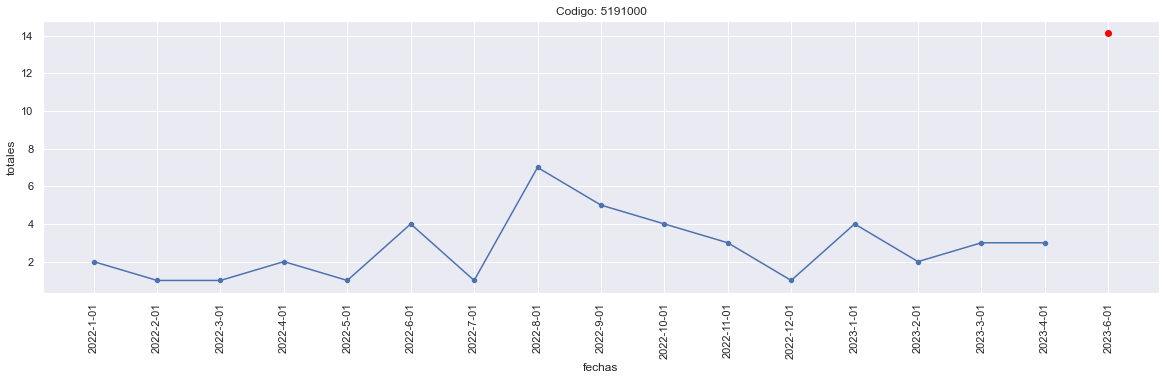

In [203]:
plt.figure(figsize=(20, 5))
sns.set(color_codes=True)
plt.xticks(rotation=90)
sns.scatterplot(x='fechas', y='totales', data=df_graf)
plt.scatter(x=(str(anio_in)+'-'+str(mes_in)+'-01'), y=pred, color='red')
plt.plot(df_graf.fechas, df_graf.totales)
plt.title("Codigo: "+codigo_in)
plt.show()